question 1

(a)A Classification Decision Tree addresses categorical decision-making problems where the goal is to predict a discrete class label for an observation based on its input features. It operates by splitting the dataset into subsets based on the feature values, forming a tree-like structure. Each decision node represents a test on an attribute, and each leaf node represents a class label. The problem type typically involves: supervised learning (labeled data) and identifying which category (class) an observation belongs to based on input features. Real-world applications include: healthcare diagnosis, fraud detection, species identification, etc.

(b) A Classification Decision Tree predicts categorical class labels by splitting data into subsets based on feature values, following a tree structure where each node represents a decision. It outputs a class label or probability. In contrast, Multiple Linear Regression predicts continuous numerical values by modeling a linear relationship between features and the target, computing predictions as a weighted sum of input features. Trees handle non-linear relationships, while regression assumes linearity, making them suited for distinct types of problems.

question 2

1.Accuracy:
Application: Evaluating the overall performance of a spam email detection system.
Rationale: Accuracy is useful when the cost of false positives (legitimate emails marked as spam) and false negatives (spam emails marked as legitimate) is similar. It measures how well the system classifies both spam and legitimate emails across all cases.

2.Sensitivity: Application: Medical diagnosis for detecting cancer in patients. Rationale: Sensitivity is critical when identifying all true positive cases is a priority. Missing a positive case (false negative) can have serious consequences, so it’s crucial to correctly identify as many actual cancer cases as possible.

3.Specificity:
Application: Screening for drug use in employment tests.
Rationale: Specificity is important to minimize false positives, as incorrectly classifying a non-user as a user can have severe implications for the individual. It ensures the system accurately identifies those who do not use drugs.

4.Precision:
Application: Flagging fraudulent credit card transactions.
Rationale: Precision is important to avoid false alarms (false positives), as investigating legitimate transactions flagged as fraud can inconvenience customers and waste resources. It ensures flagged transactions are likely to be truly fraudulent.

question 3

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])
ab_reduced_noNaN = ab_reduced.dropna()
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

print(ab_reduced_noNaN.info())

print(ab_reduced_noNaN.head())

question 4

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])
ab_reduced_noNaN = ab_reduced.dropna()
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")
print(ab_reduced_noNaN.info())

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          319 non-null    object 
 1   Author         319 non-null    object 
 2   List Price     319 non-null    float64
 3   Amazon Price   319 non-null    float64
 4   Hard_or_Paper  319 non-null    object 
 5   NumPages       319 non-null    float64
 6   Publisher      319 non-null    object 
 7   Pub year       319 non-null    float64
 8   ISBN-10        319 non-null    object 
 9   Thick          319 non-null    float64
dtypes: float64(5), object(5)
memory usage: 27.4+ KB
None


In [4]:
from sklearn.model_selection import train_test_split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")

Training set size: 255
Testing set size: 64


[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.194\nsamples = 221\nvalue = [197, 24]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.355\nsamples = 52\nvalue = [40, 12]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.132\nsamples = 169\nvalue = [157, 12]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 29.225\ngini = 0.465\nsamples = 98\nvalue = [36, 62]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.382\nsamples = 74\nvalue = [19, 55]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.413\nsamples = 24\nvalue = [17, 7]\nclass = Paperback')]

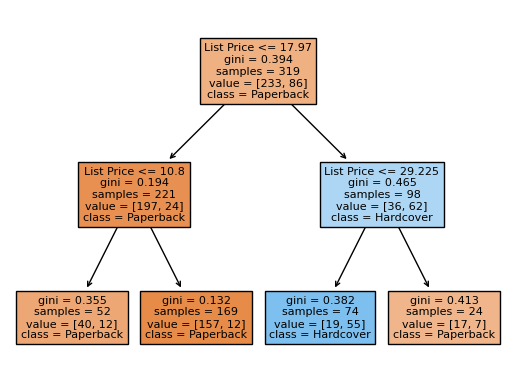

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 'H' for hardcover
X = ab_reduced_noNaN[['List Price']]
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)

question 5

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])
ab_reduced_noNaN = ab_reduced.dropna()
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

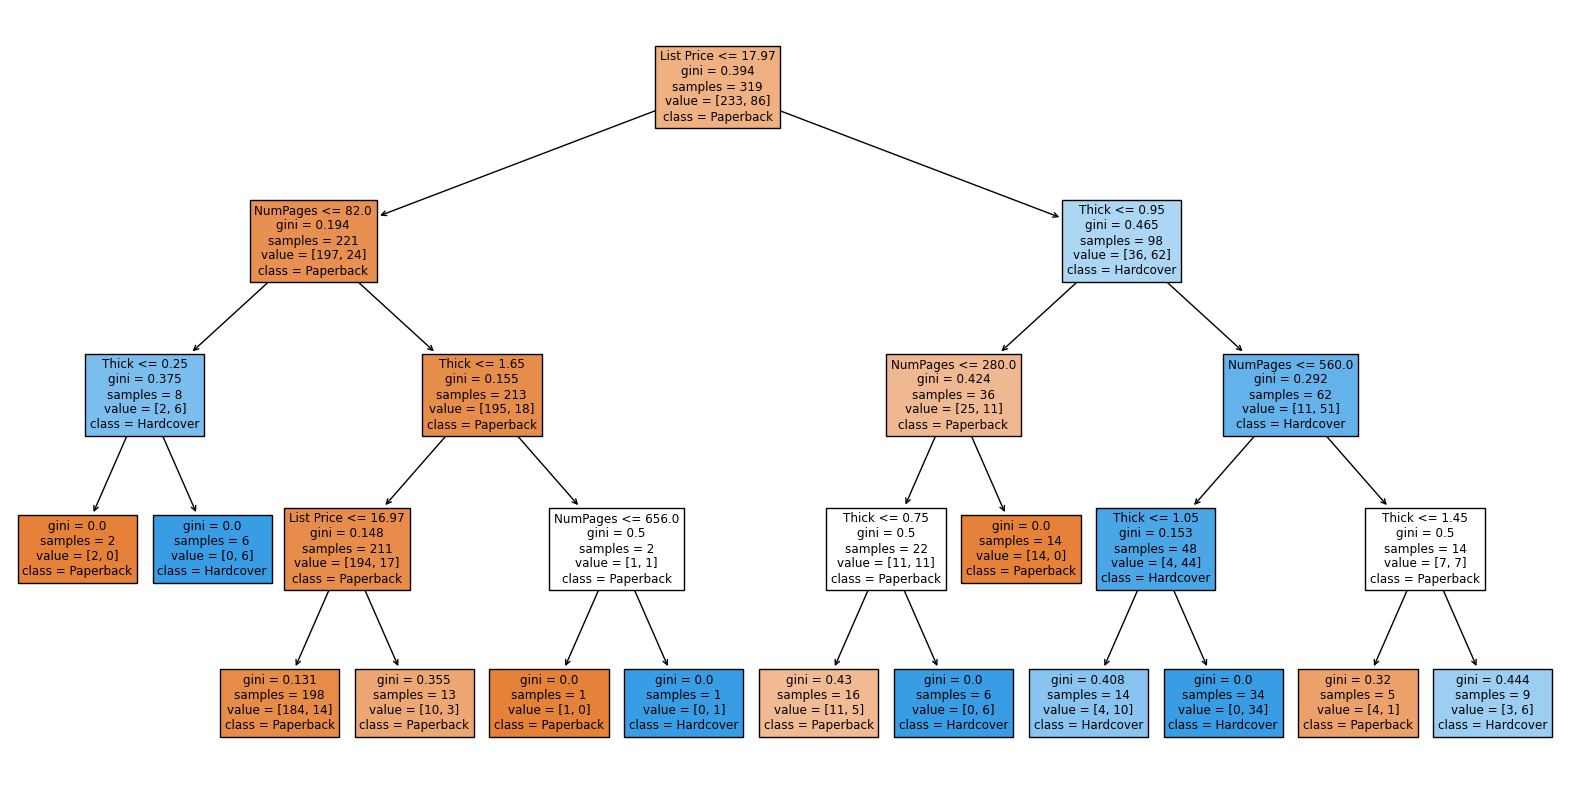

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 'H' for hardcover

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

plt.figure(figsize=(20, 10))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()

question 6

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

if 'ab_reduced_noNaN_test' in locals() and 'clf' in locals() and 'clf2' in locals():
    X_test_clf = ab_reduced_noNaN_test[['List Price']]
    X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
    y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

    y_pred_clf = clf.predict(X_test_clf)
    cm_clf = confusion_matrix(y_test, y_pred_clf)
    accuracy_clf = accuracy_score(y_test, y_pred_clf)
    sensitivity_clf = recall_score(y_test, y_pred_clf)  # Sensitivity = Recall
    specificity_clf = cm_clf[0, 0] / (cm_clf[0, 0] + cm_clf[0, 1])  # TN / (TN + FP)

    y_pred_clf2 = clf2.predict(X_test_clf2)
    cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
    accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)
    sensitivity_clf2 = recall_score(y_test, y_pred_clf2)  # Sensitivity = Recall
    specificity_clf2 = cm_clf2[0, 0] / (cm_clf2[0, 0] + cm_clf2[0, 1])  # TN / (TN + FP)

    {
        "clf": {
            "Confusion Matrix": cm_clf.tolist(),
            "Accuracy": accuracy_clf,
            "Sensitivity": sensitivity_clf,
            "Specificity": specificity_clf
        },
        "clf2": {
            "Confusion Matrix": cm_clf2.tolist(),
            "Accuracy": accuracy_clf2,
            "Sensitivity": sensitivity_clf2,
            "Specificity": specificity_clf2
        }
    }
else:
    "Train-test split or models are missing. Ensure data preprocessing and model training are completed first."

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

X_test_clf = ab_reduced_noNaN_test[['List Price']]
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

y_pred_clf = clf.predict(X_test_clf)
cm_clf = confusion_matrix(y_test, y_pred_clf)
accuracy_clf = accuracy_score(y_test, y_pred_clf)
sensitivity_clf = recall_score(y_test, y_pred_clf)  # Sensitivity = Recall
specificity_clf = cm_clf[0, 0] / (cm_clf[0, 0] + cm_clf[0, 1])  # TN / (TN + FP)

y_pred_clf2 = clf2.predict(X_test_clf2)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)
sensitivity_clf2 = recall_score(y_test, y_pred_clf2)  # Sensitivity = Recall
specificity_clf2 = cm_clf2[0, 0] / (cm_clf2[0, 0] + cm_clf2[0, 1])  # TN / (TN + FP)

print("Metrics for clf:")
print(f"Confusion Matrix:\n{cm_clf}")
print(f"Accuracy: {accuracy_clf}")
print(f"Sensitivity (Recall): {sensitivity_clf}")
print(f"Specificity: {specificity_clf}\n")

print("Metrics for clf2:")
print(f"Confusion Matrix:\n{cm_clf2}")
print(f"Accuracy: {accuracy_clf2}")
print(f"Sensitivity (Recall): {sensitivity_clf2}")
print(f"Specificity: {specificity_clf2}")

Metrics for clf:
Confusion Matrix:
[[40  4]
 [ 3 17]]
Accuracy: 0.890625
Sensitivity (Recall): 0.85
Specificity: 0.9090909090909091

Metrics for clf2:
Confusion Matrix:
[[42  2]
 [ 2 18]]
Accuracy: 0.9375
Sensitivity (Recall): 0.9
Specificity: 0.9545454545454546


question 7

The differences between the two confusion matrices arise from the features used for prediction. The first matrix (from clf) uses only List Price, limiting the model's ability to capture relationships with the target variable. The second matrix (from clf2) uses additional features like NumPages and Thick, allowing for more accurate and nuanced predictions. The test-set confusion matrices for clf and clf2 are better because they reflect generalized performance on unseen data, avoiding overfitting seen in training data results.

question 8

how to visualize feature Importances available for scikit-learn classification decision trees:

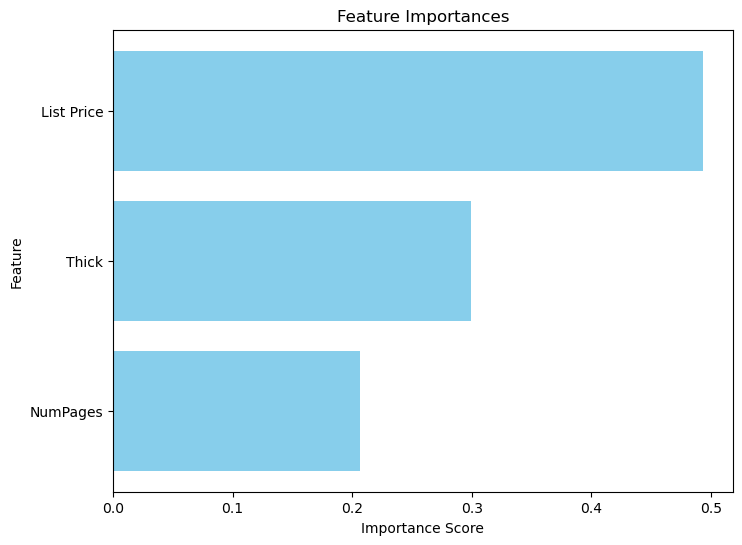

In [10]:
import matplotlib.pyplot as plt

# Assuming clf2 is your trained DecisionTreeClassifier
importances = clf2.feature_importances_  # Extract feature importances
feature_names = clf2.feature_names_in_  # Names of the features used in training

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

for clf2:

In [11]:
from sklearn.tree import DecisionTreeClassifier

X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

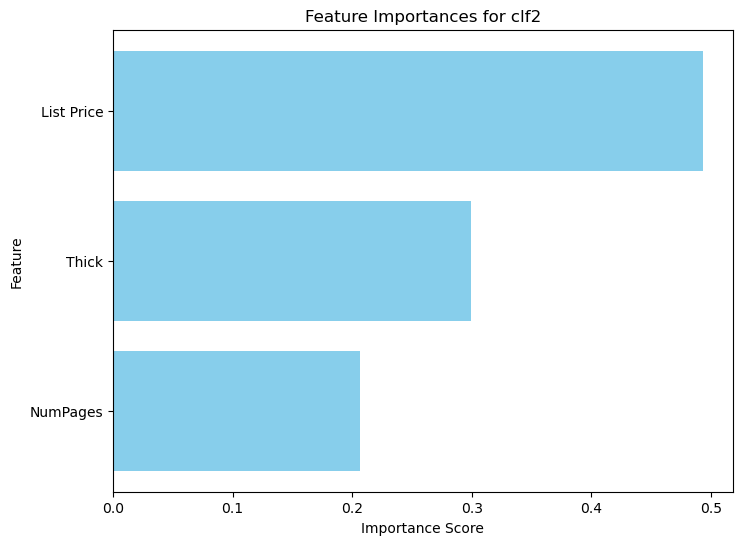

The most important predictor variable is: List Price


In [12]:
import matplotlib.pyplot as plt

importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances for clf2')
plt.show()

most_important_feature = feature_names[importances.argmax()]
print(f"The most important predictor variable is: {most_important_feature}")

use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2

In [15]:
if 'clf2' in locals():
    importances = clf2.feature_importances_
    feature_names = clf2.feature_names_in_
    most_important_feature = feature_names[importances.argmax()]
    most_important_feature
else:
    "The model clf2 is not defined. Ensure the model is trained before attempting to retrieve feature importances."

question 9

Linear regression coefficients show the direct, additive effect of each predictor on the outcome, making them straightforward to interpret. In decision trees, feature importances reflect a variable’s overall contribution to reducing impurity across splits, without providing a direct relationship or effect size. This makes tree-based interpretations more abstract and less specific than linear models.

question 10: yes

summary: In this session, we explored preprocessing the Amazon books dataset by removing specific columns, handling missing values, and ensuring appropriate data types. We split the data into training and test sets, trained two decision tree models (clf and clf2) with different feature sets and depths, and evaluated their performance using confusion matrices, sensitivity, specificity, and accuracy. We also visualized feature importances for clf2 and identified the most important predictor variable. Lastly, we compared the interpretability of feature importances in decision trees with coefficients in linear regression.

chatbox link: https://chatgpt.com/share/...